#### &#xE10F; Number representations

$$
\begin{gather}
\\
[ a_{31}, a_{30}, \dots , a_1, a_0]
\\
{\color{Salmon}u} = \sum_{i=0}^{32} a_i * 2^i \quad \left.\in[ 0, \dots, 2^{32}-1 ]\right|2^{32}
\\
{\color{YellowGreen}sm} = (-1)^{a_{31}} * \sum_{i=0}^{30} a_i * 2^i \quad \left.\in[ -2^{31}+1, \dots, -0, +0, \dots, 2^{31}-1 ]\right|2^{32}-1
\\
{\color{Orange}tc} = -a_{31} * 2^{31} + \sum_{i=0}^{30} a_i * 2^i \quad \left.\in[ -2^{31}, \dots, 0, \dots, 2^{31}-1 ]\right|2^{32}
\end{gather}
$$

- [ ] Overflow

$$
\begin{gather}
  a + b = 2^{32} + c \quad ( overflow) \qquad \qquad \\
  \begin{cases}
  a - c = 2^{32} - b > 0  & \quad ( b \in [ 0, \dots, 2^{32}-1 ] ) \\
  and \\
  b - c = 2^{32} - a > 0  & \quad ( a \in [ 0, \dots, 2^{32}-1 ] )
  \end{cases}
  \\
  \begin{cases}
  c < a \\
  c < b
  \end{cases} \qquad \qquad
\end{gather}
$$

- [ ] No Overflow

$$
\begin{gather}
  a + b = c \quad \text{ ( no overflow) } \qquad \qquad \\
  \begin{cases}
  c \geq a \\
  c \geq b
  \end{cases}
\end{gather}
$$

using Plots
using LaTeXStrings

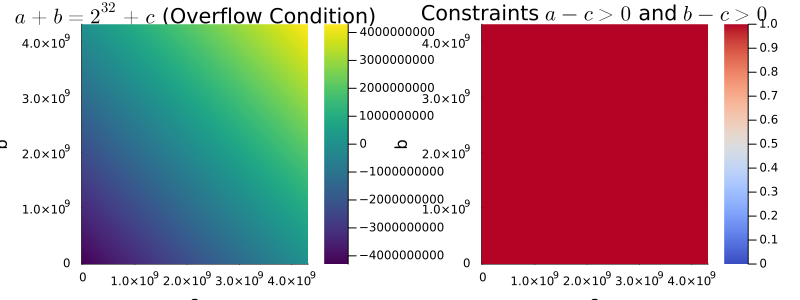

In [29]:
# Constants
max_val = 2^32 - 1

# Define ranges for a, b
a = range(0, max_val, length=100)
b = range(0, max_val, length=100)

# Create a grid for plotting
A, B = [i for i in a, j in b], [j for i in a, j in b]

# Overflow condition
C = A .+ B .- 2^32

# Constraints
# a - c > 0 and b - c > 0
constraint1 = (A .- C) .> 0
constraint2 = (B .- C) .> 0
constraints = constraint1 .& constraint2

# Plot
p1 = heatmap(a, b, C, title=L"a + b = 2^{32} + c " * " (Overflow Condition)", xlabel="a", ylabel="b", levels=20, color=:viridis)
p2 = heatmap(a, b, constraints, title="Constraints " * L"a - c > 0" * " and " * L" b - c > 0", xlabel="a", ylabel="b", color=:coolwarm)

plot(p1, p2, layout=(1, 2), size=(800, 300))


In [59]:
# Function to plot a 32-bit register using bar series with reversed index and plotting
function plot_register_bars()
    # Create data for the bar plot
    bits = 31:-1:0  # Reverse bit positions starting from 31
    values = reverse(ones(32))  # Reverse the values array, all bars have the same height

    # Create a bar plot
    bar(bits, values
        , fillcolor=:skyblue, legend=false
        , bar_width=0.5
        # Adjust plot settings
        , xlims = (-1, 32), ylims = (0, 1.5)
        , yaxis = :false
        # , xticks = (0:1:31)  # Set x-axis ticks from 0 to 31
        , xflip = true  # Reverse the x-axis
        , title = "Visual Representation of a 32-bit RISC-V Register"
    )

    # Add annotations for LSB and MSB
    annotate!(0, 1.1, text("LSB\n(bit 0)", 8, :center, :black))
    annotate!(31, 1.1, text("MSB\n(bit 31)", 8, :center, :black))
end

plot_register_bars (generic function with 1 method)

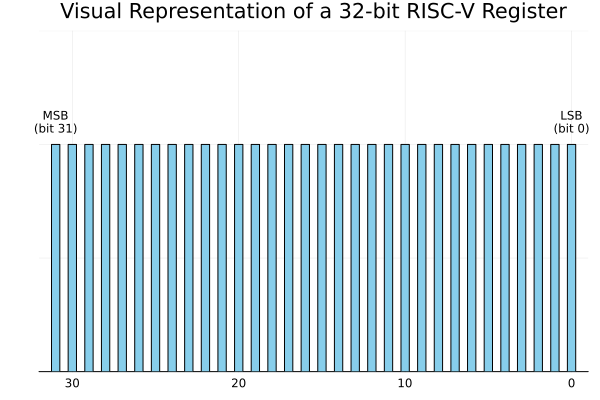

In [60]:
# Plot the register with bars
plot_register_bars()


```C
// Ex. 19: Translate from C to Julia
int acc(void) {
    int i, sum;
    sum = 0;
    for(i = 0; i <= 100; i++) {
        sum += i;
    }
return sum;
}
```

In [61]:
function acc()
    sum = 0
    for i in 0:100
        sum += i
    end
    return sum
end

result = acc()
println("Sum: $result")


Sum: 5050
